In [19]:
# импорт бибилиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
%matplotlib inline

In [20]:
df = pd.read_csv('C1_result.csv')
df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,year,month,day,hour,category_travel_time
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,0,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,14,17,2.0
1,1,2016-03-14 14:05:39,1,-73.975090,40.758766,-73.953201,40.765068,0,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,14,14,4.0
2,1,2016-03-14 15:04:38,1,-73.994484,40.745087,-73.998993,40.722710,0,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,14,15,3.0
3,2,2016-03-14 04:24:36,3,-73.944359,40.714489,-73.910530,40.709492,0,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,14,4,3.0
4,2,2016-03-14 14:57:56,1,-73.952881,40.766468,-73.978630,40.761921,0,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,14,15,4.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964658 entries, 0 to 964657
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id             964658 non-null  int64  
 1   pickup_datetime       964658 non-null  object 
 2   passenger_count       964658 non-null  int64  
 3   pickup_longitude      964658 non-null  float64
 4   pickup_latitude       964658 non-null  float64
 5   dropoff_longitude     964658 non-null  float64
 6   dropoff_latitude      964658 non-null  float64
 7   store_and_fwd_flag    964658 non-null  int64  
 8   maximum temperature   964658 non-null  float64
 9   minimum temperature   964658 non-null  float64
 10  average temperature   964658 non-null  float64
 11  precipitation         964658 non-null  float64
 12  snow fall             964658 non-null  float64
 13  snow depth            964658 non-null  float64
 14  year                  964658 non-null  int64  
 15  

Конвертируем category_travel_time для последующего обучения модели

In [22]:
df['category_travel_time'] = df['category_travel_time'].astype('category')

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

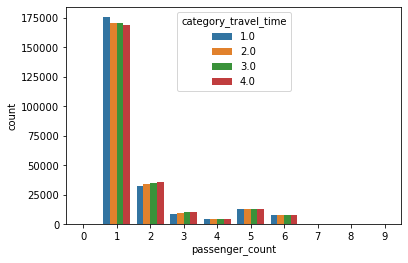

In [23]:
sns.countplot(x='passenger_count', data = df, hue = 'category_travel_time')

# Разбиение набора данных

In [24]:
df = df.drop(['pickup_datetime', 'pickup_latitude','pickup_longitude', 'dropoff_longitude','dropoff_latitude'], axis = 1)

In [25]:
X = df.drop(['category_travel_time'], axis = 1)
y = df['category_travel_time']

# Разделим данные на тестовые и обучающую выборки, в соотношении 80 на 20

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Классификация исходных компетенций
Были выбраны 3 метода, такие как: Логистическая Регрессия, k Ближайших Соседей и множество деревьев. Эти методы были выбраны, так как они относятся к числу распространенных методов решения задачи классификации.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [29]:
lr = LogisticRegression()

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)

In [31]:
rfc = RandomForestClassifier()

# Обучение моделей
Обучим выбранные модели, затем оценим их качество и выберем лучшую.

In [32]:
%%time
lr.fit(X_train, y_train)

CPU times: total: 38.6 s
Wall time: 9.98 s


LogisticRegression()

In [33]:
%%time
knn.fit(X_train, y_train)

CPU times: total: 8.12 s
Wall time: 8.36 s


KNeighborsClassifier()

In [34]:
%%time
rfc.fit(X_train, y_train)

CPU times: total: 1min 49s
Wall time: 1min 51s


RandomForestClassifier()

In [35]:
lr_pred = lr.predict(X_test)

In [36]:
knn_pred = knn.predict(X_test)

In [37]:
rfc_pred = rfc.predict(X_test)

# Оценка качества моделей
Для оценки качества модели выберем метрики: аккуратность и отчёт классификации

Отчёт о классификации

In [38]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

         1.0       0.27      0.41      0.33     72605
         2.0       0.25      0.10      0.15     72092
         3.0       0.26      0.14      0.18     72768
         4.0       0.27      0.41      0.32     71933

    accuracy                           0.27    289398
   macro avg       0.26      0.27      0.24    289398
weighted avg       0.26      0.27      0.24    289398



In [39]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

         1.0       0.27      0.37      0.31     72605
         2.0       0.25      0.28      0.26     72092
         3.0       0.26      0.22      0.24     72768
         4.0       0.27      0.19      0.22     71933

    accuracy                           0.26    289398
   macro avg       0.26      0.26      0.26    289398
weighted avg       0.26      0.26      0.26    289398



In [40]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

         1.0       0.29      0.29      0.29     72605
         2.0       0.25      0.23      0.24     72092
         3.0       0.25      0.24      0.25     72768
         4.0       0.29      0.33      0.30     71933

    accuracy                           0.27    289398
   macro avg       0.27      0.27      0.27    289398
weighted avg       0.27      0.27      0.27    289398



Две модели показали одниаковую точность, поэтому оценим точность отдельно

In [41]:
print(accuracy_score(lr_pred, y_test))

0.26587951540784666


In [42]:
print(accuracy_score(knn_pred, y_test))

0.2627281460134486


In [43]:
print(accuracy_score(rfc_pred, y_test))

0.2720371253429533


Наилучшее качество показала модель RandomForestClassifier